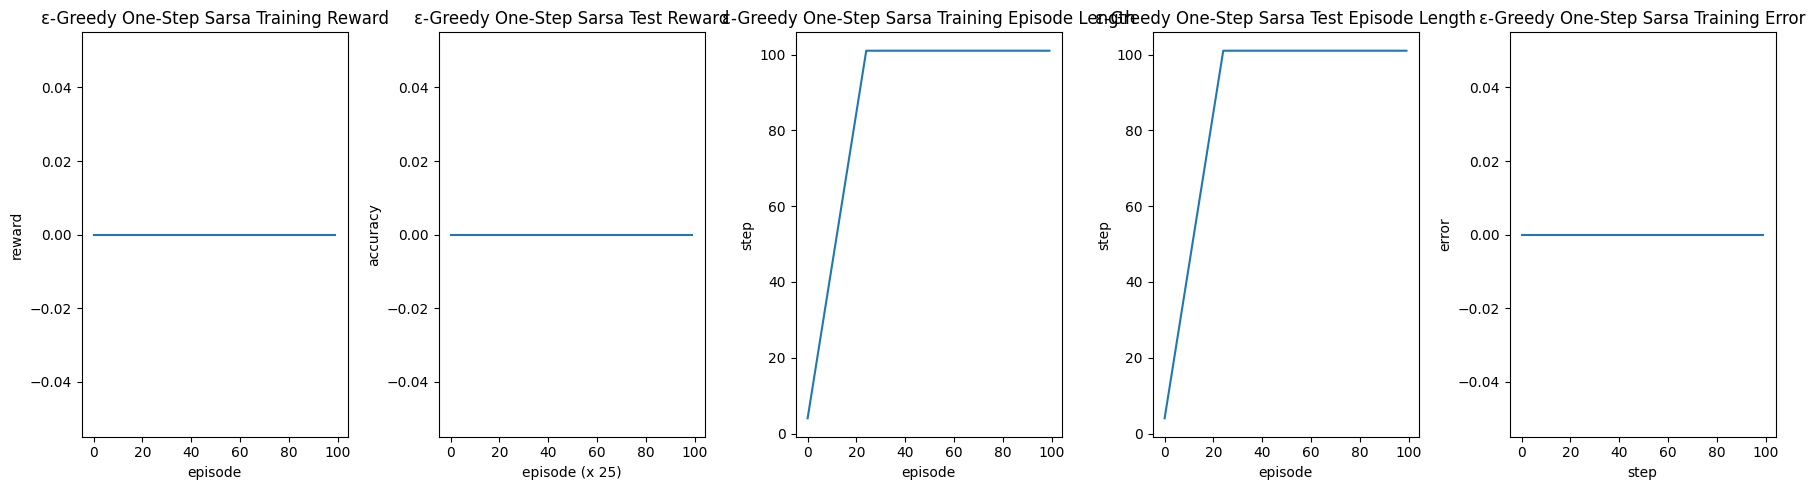

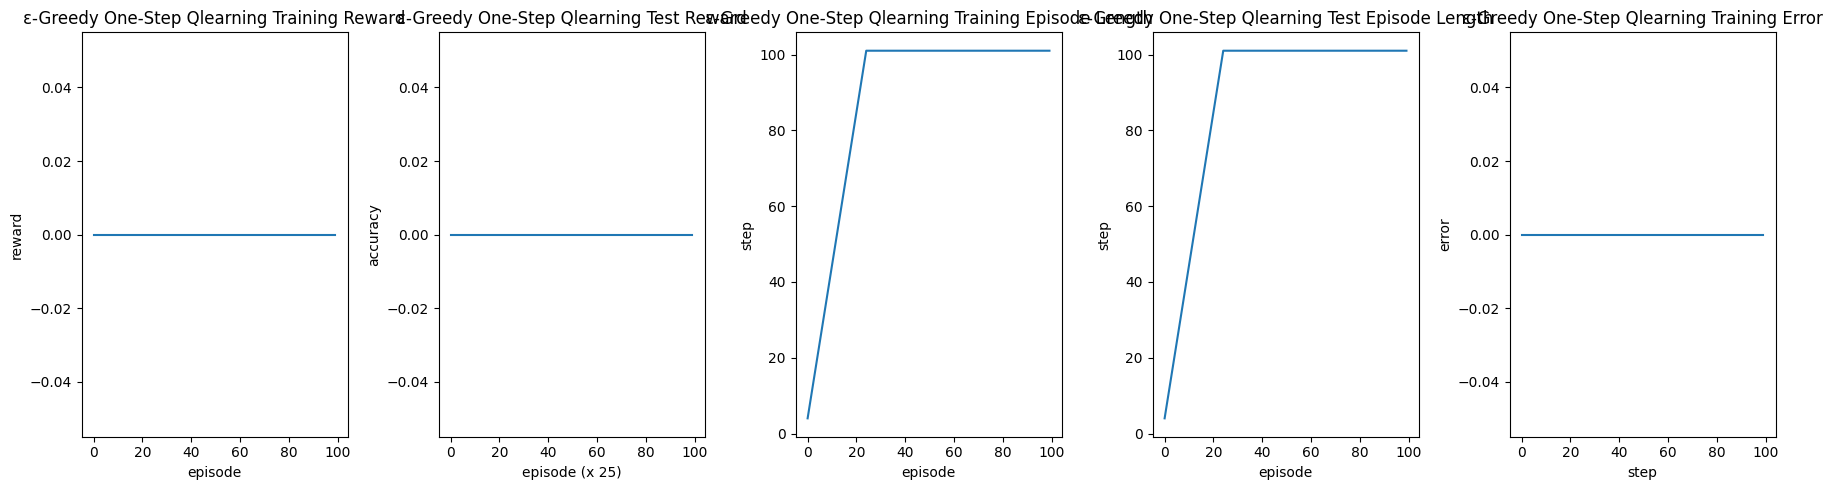

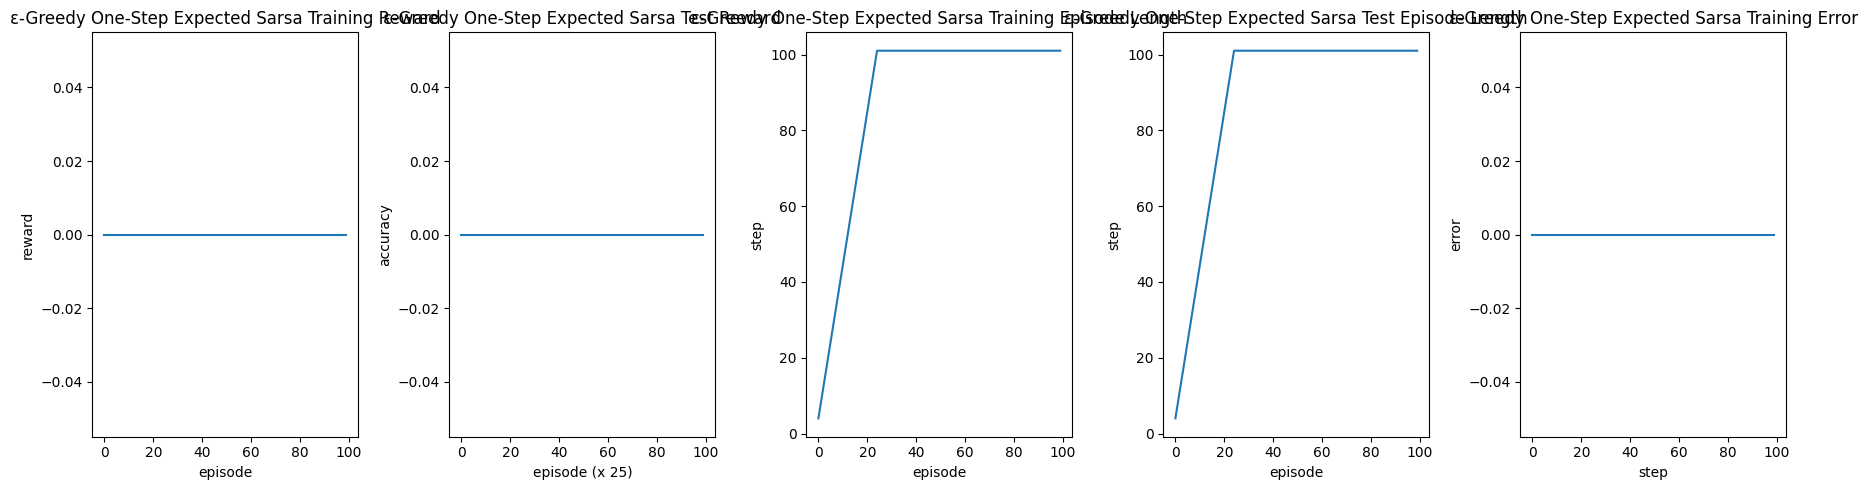

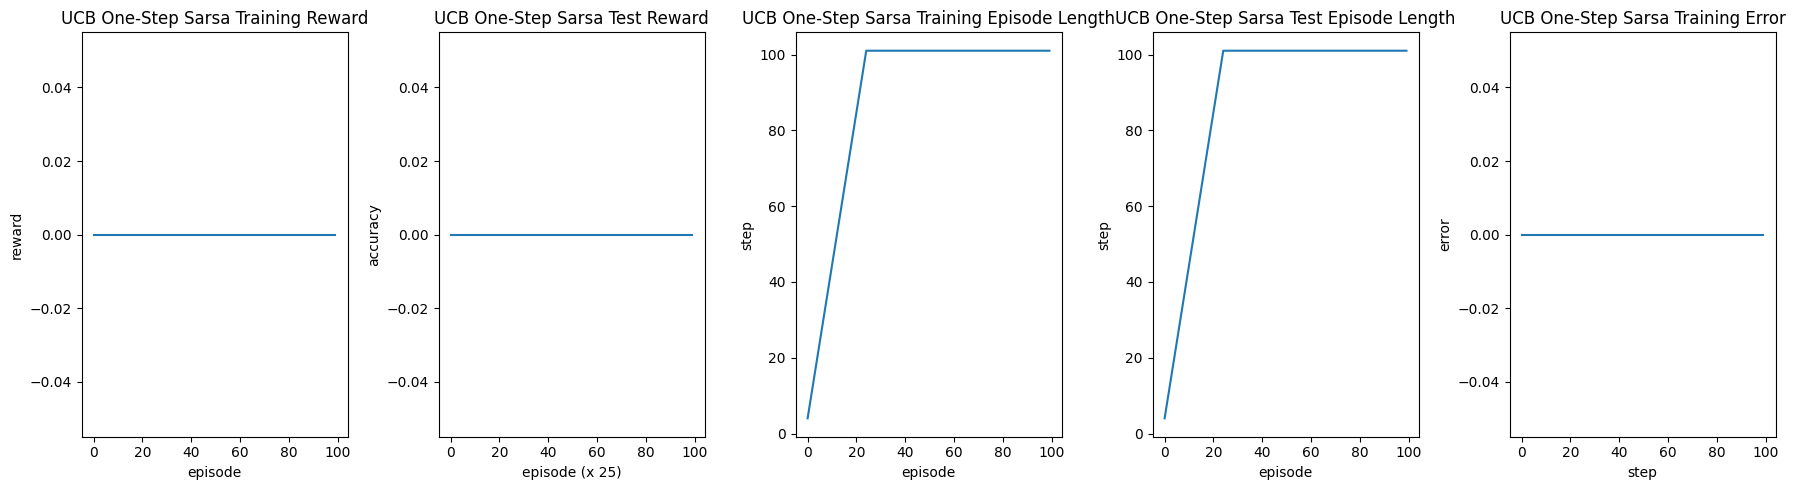

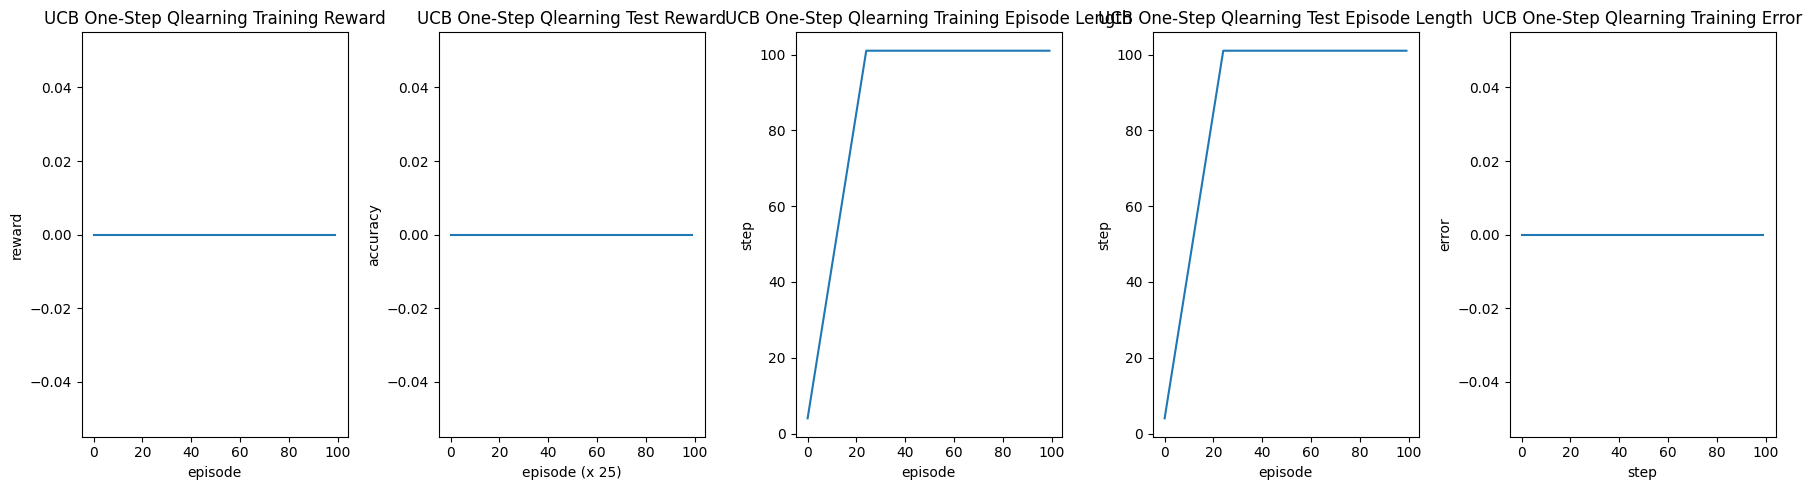

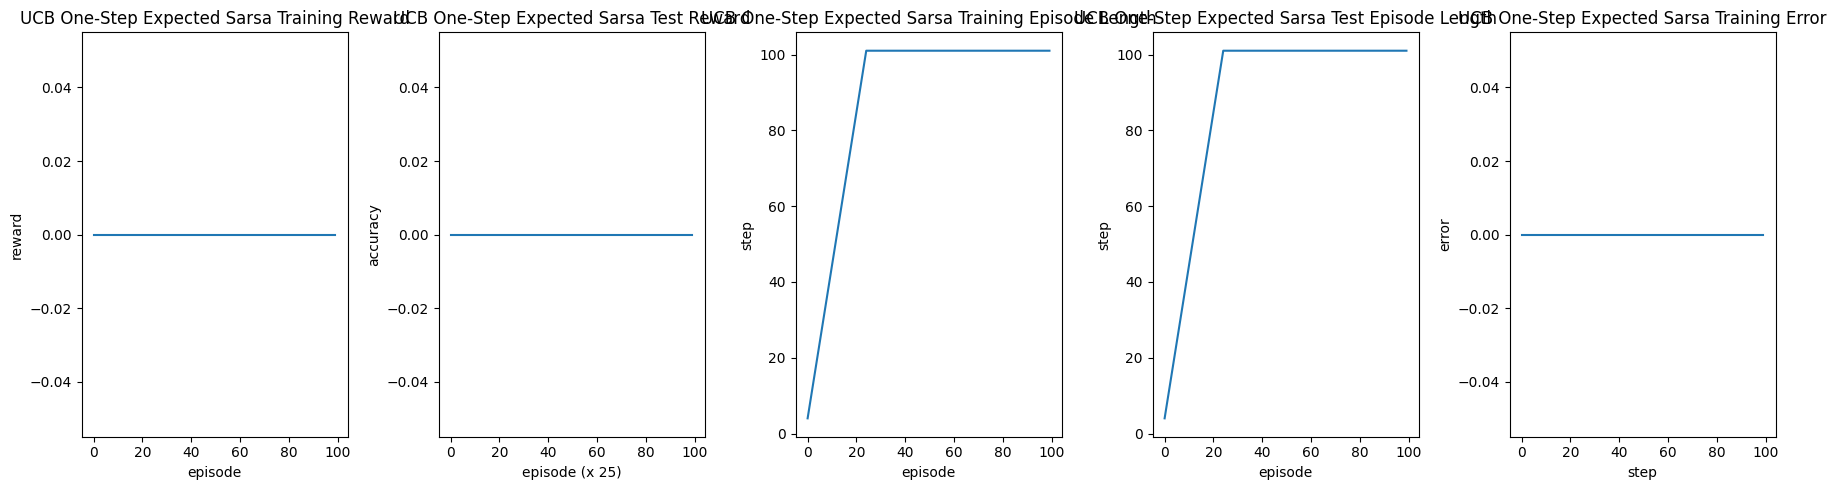

In [10]:
import json
import matplotlib.pyplot as plt
import numpy as np

with open("results.json", 'r') as file:
    dataset = json.load(file)

rolling_length = 25

for i in range(6):
    fig, axs = plt.subplots(ncols=5, figsize=(18, 5))
    axs[0].set_title(f'{dataset["identifiers"][i]} Training Reward')
    axs[0].set_xlabel('episode')
    axs[0].set_ylabel('reward')
    rewards_moving_average = np.convolve(dataset["train_rewards"][i], np.ones(rolling_length), mode="full") / rolling_length
    axs[0].plot(rewards_moving_average[:len(dataset["train_rewards"][i])])

    axs[1].set_title(f'{dataset["identifiers"][i]} Test Reward')
    axs[1].set_xlabel('episode (x 25)')
    axs[1].set_ylabel('accuracy')
    rewards_moving_average = np.convolve(dataset["test_rewards"][i], np.ones(rolling_length), mode="full") / rolling_length
    axs[1].plot(rewards_moving_average[:len(dataset["test_rewards"][i])])

    axs[2].set_title(f'{dataset["identifiers"][i]} Training Episode Length')
    axs[2].set_xlabel('episode')
    axs[2].set_ylabel('step')
    steps_moving_average = np.convolve(np.array(dataset["train_episodes_length"][i]), np.ones(rolling_length), mode="full") / rolling_length
    axs[2].plot(steps_moving_average[:len(dataset["train_episodes_length"][i])])

    axs[3].set_title(f'{dataset["identifiers"][i]} Test Episode Length')
    axs[3].set_xlabel('episode')
    axs[3].set_ylabel('step')
    steps_moving_average = np.convolve(np.array(dataset["test_episodes_length"][i]), np.ones(rolling_length), mode="full") / rolling_length
    axs[3].plot(steps_moving_average[:len(dataset["test_episodes_length"][i])])

    axs[4].set_title(f'{dataset["identifiers"][i]} Training Error')
    axs[4].set_xlabel('step')
    axs[4].set_ylabel('error')
    training_error_moving_average = np.convolve(np.array(dataset["train_errors"][i]), np.ones(rolling_length), mode="full") / rolling_length
    axs[4].plot(training_error_moving_average[:len(dataset["train_errors"][i])])

    plt.tight_layout()
    plt.show()